### COVID-19 
### UPDATE by DAY in the countries: 
#### CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA, LUXEMBOURG, UK, CANADA, VIETNAM
#### (Start recorded day: 22.01.2020)

In [1]:
from covid import *
%matplotlib inline

Start importing World-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


/home/edvs1/lphan/.conda/envs/aic/lib/python3.7/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


### Number of covid-19 outbreak days 

In [85]:
rcParams['figure.figsize'] = 20, 10
len(data)

382

In [86]:
updated_date=files[-1].split('.')[0]
updated_date

'02-06-2021'

### New cases in the World changed by day

### ARE WE BEATING COVID-19?

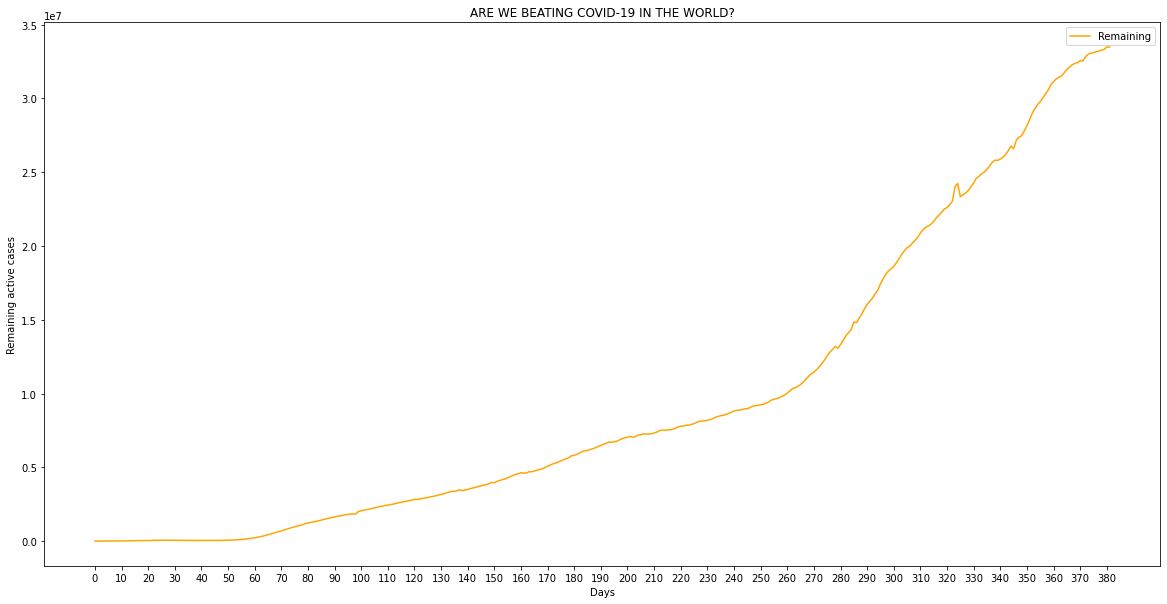

In [87]:
remaining_by_day = np.array(totalconfirmed_by_day) - np.array(totalrecovered_by_day) - np.array(totalfatalities_by_day)

plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, remaining_by_day, color='orange', label='Remaining')
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")
plt.legend()
plt.savefig('output/AreWeBeatingCovid.jpg')

In [93]:
total_confirmed_df = pd.DataFrame.from_dict(data=y_dat_confirmed)
total_fatal_df = pd.DataFrame.from_dict(data=y_dat_deaths)
total_recovered_df = pd.DataFrame.from_dict(data=y_dat_recovered)
total_remaining_df = total_confirmed_df-total_fatal_df-total_recovered_df
total_remaining_df.tail(1)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
381,4895.0,31891.0,31390.0,609.0,1112.0,94.0,155520.0,5246.0,1856.0,13677.0,...,3818786.0,5862.0,934.0,0.0,6846.0,482.0,8039.0,84.0,7178.0,4788.0


### Countries are beating COVID most

,381
Micronesia,0.0
Marshall Islands,0.0
Vanuatu,0.0
Diamond Princess,0.0
Samoa,0.0
Congo (Kinshasa),0.0
Congo (Brazzaville),0.0
MS Zaandam,0.0
Tajikistan,0.0
Grenada,1.0


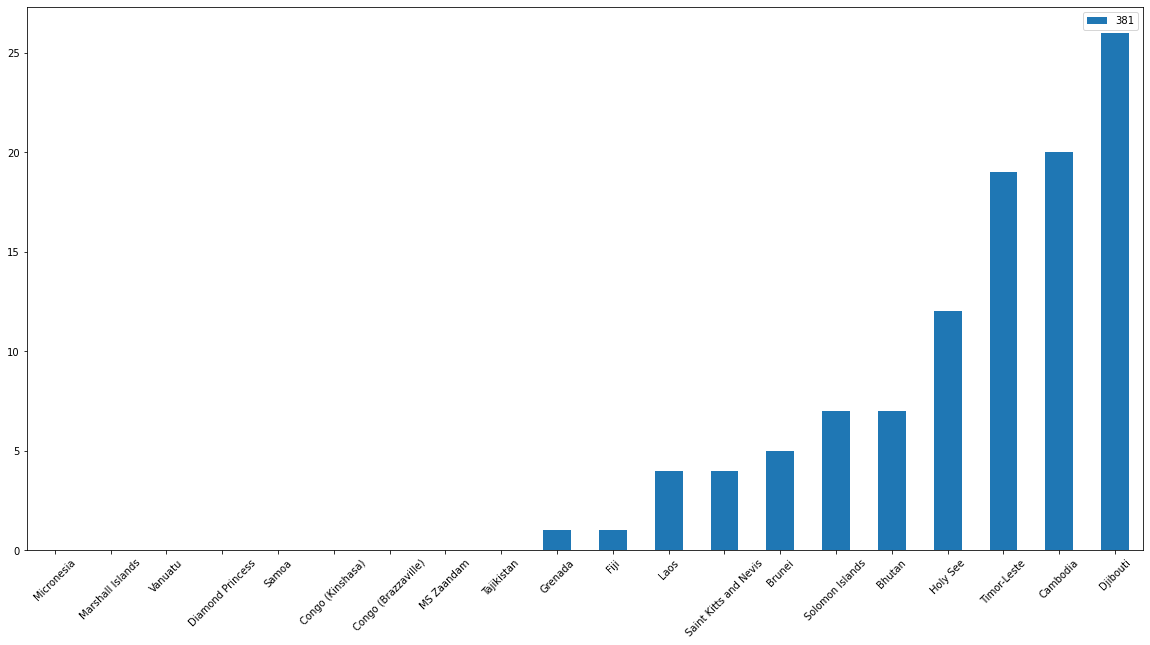

In [94]:
index = total_remaining_df.tail(1)
top_remaining = total_remaining_df.tail(1).transpose().sort_values(by=index.index[0], ascending=True).head(20)
top_remaining.plot(kind='bar')
plt.xticks(rotation=45)
top_remaining

Text(0.5, 1.0, 'ARE WE BEATING COVID-19 IN THE WORLD?')

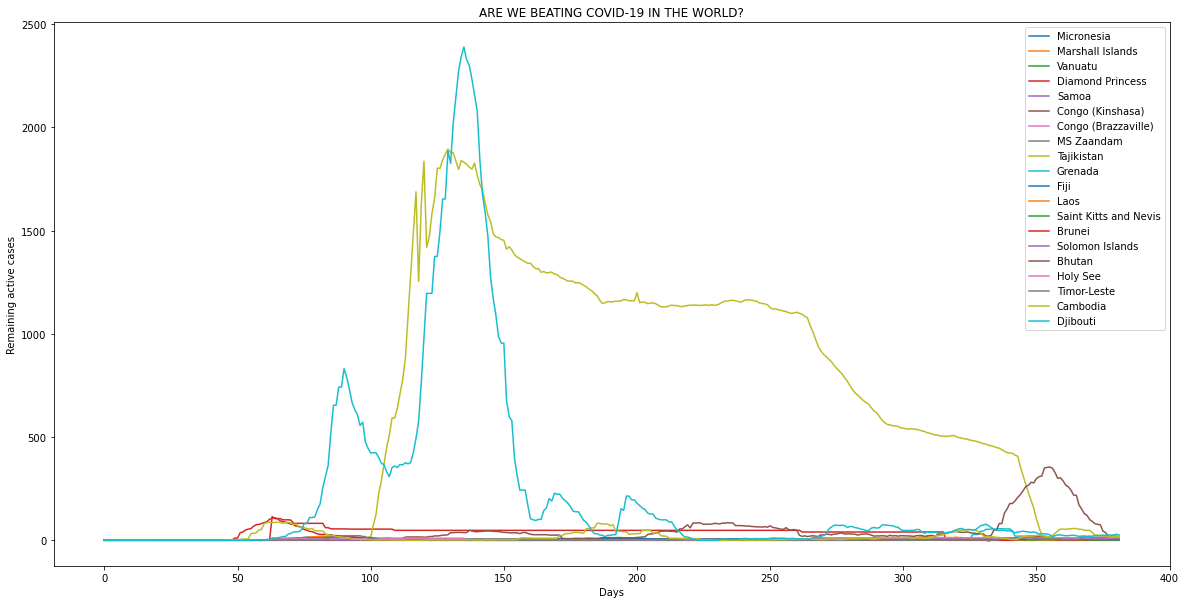

In [116]:
total_remaining_df[top_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")

### Countries are beating COVID least

,381
US,15346343.0
United Kingdom,3818786.0
France,3058427.0
Spain,2730228.0
Netherlands,988003.0
Brazil,788139.0
Belgium,702518.0
Sweden,575947.0
Russia,434098.0
Italy,427034.0


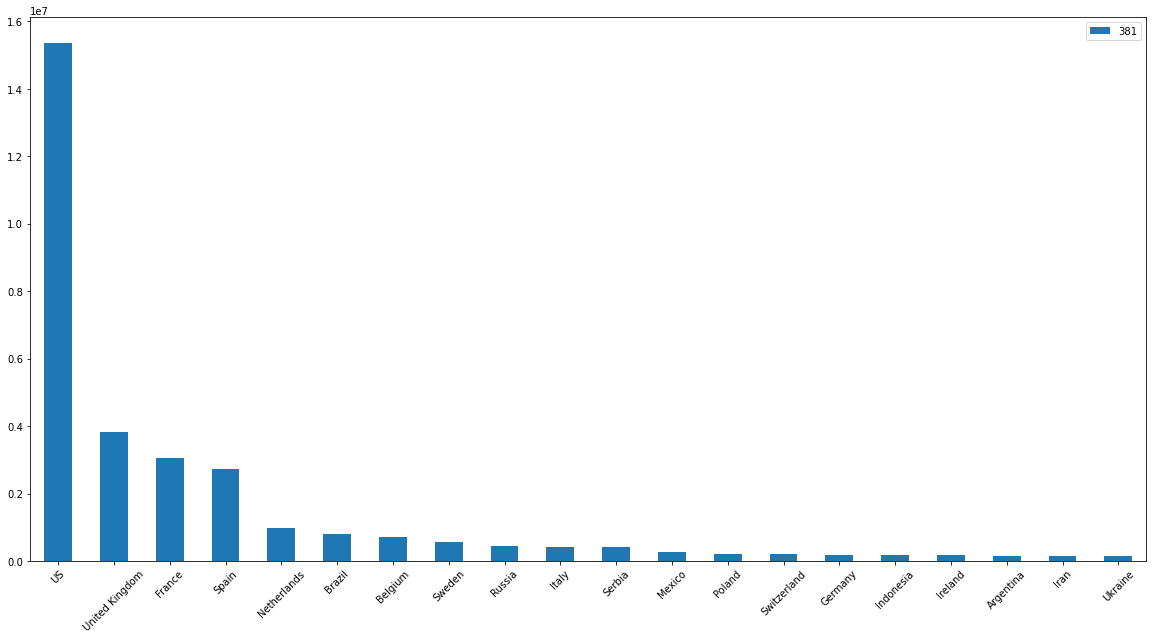

In [96]:
bottom_remaining = total_remaining_df.tail(1).transpose().sort_values(by=index.index[0], ascending=False).head(20)
bottom_remaining.plot(kind='bar')
plt.xticks(rotation=45)
bottom_remaining

Text(0.5, 1.0, 'ARE WE BEATING COVID-19 IN THE WORLD?')

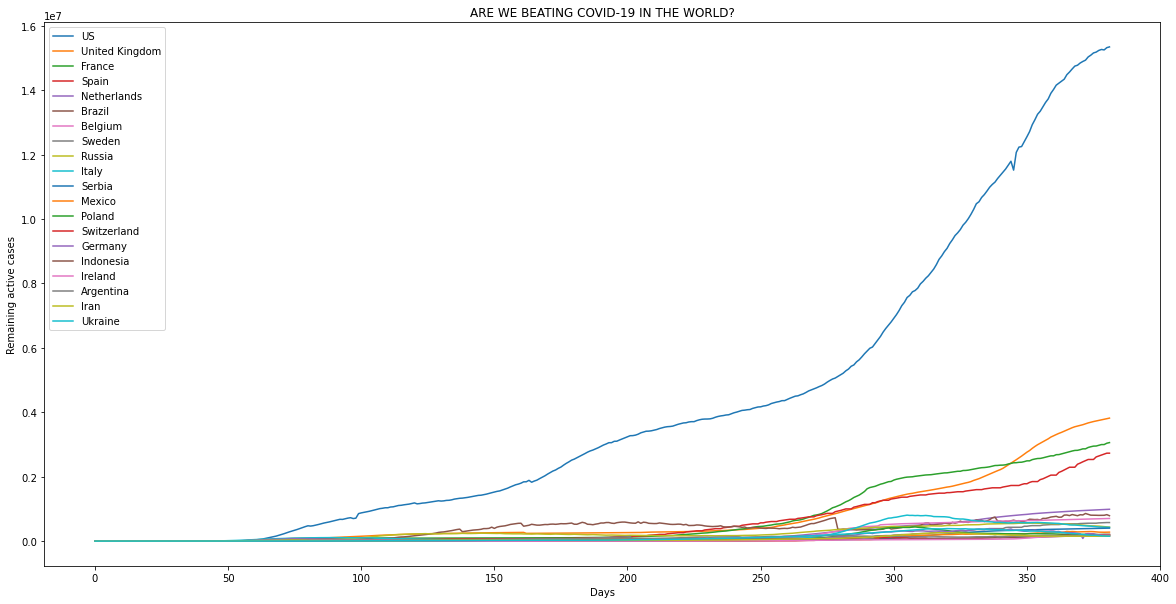

In [115]:
total_remaining_df[bottom_remaining.index].plot()
plt.xlabel('Days')
plt.ylabel('Remaining active cases')
plt.title("ARE WE BEATING COVID-19 IN THE WORLD?")

In [110]:
# Test
len(totalconfirmed_by_day) == len(totalrecovered_by_day) == len(totalfatalities_by_day), total_confirmed_df['Vietnam'].tail(1) -total_fatal_df['Vietnam'].tail(1)-total_recovered_df['Vietnam'].tail(1) == total_remaining_df['Vietnam'].tail(1), total_remaining_df['Vietnam'].tail(1)

(True,
 381    True
 Name: Vietnam, dtype: bool,
 381    482.0
 Name: Vietnam, dtype: float64)